<a href="https://colab.research.google.com/github/Yasminebenhamadi/NMA/blob/main/DL/W2D4_Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2: Introduction to GANs

**Week 2, Day 4: Generative Models**

**By Neuromatch Academy**

__Content creators:__ Kai Xu, Seungwook Han, Akash Srivastava

__Content reviewers:__ Polina Turishcheva, Melvin Selim Atay, Hadi Vafaei, Deepak Raya, Charles J Edelson, Kelson Shilling-Scrivo

__Content editors:__ Charles J Edelson, Kelson Shilling-Scrivo, Spiros Chavlis

__Production editors:__ Arush Tagade, Gagana B, Spiros Chavlis

---
# Setup

In [ ]:
# @title Install dependencies
!pip install git+https://github.com/NeuromatchAcademy/evaltools --quiet

from evaltools.airtable import AirtableForm
atform = AirtableForm('appn7VdPRseSoMXEG', 'W2D4_T2','https://portal.neuromatchacademy.org/api/redirect/to/9c55f6cb-cdf9-4429-ac1c-ec44fe64c303')

In [ ]:
# Imports
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# @title Figure settings
import ipywidgets as widgets       # Interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")
plt.rc('axes', unicode_minus=False)

In [ ]:
# @title Plotting functions

ld_true = [-7.0066e-01, -2.6368e-01, -2.4250e+00, -2.0247e+00, -1.1795e+00,
        -4.5558e-01, -7.1316e-01, -1.0932e-01, -7.8608e-01, -4.5838e-01,
        -1.0530e+00, -9.1201e-01, -3.8020e+00, -1.7787e+00, -1.2246e+00,
        -6.5677e-01, -3.6001e-01, -2.2313e-01, -1.8262e+00, -1.2649e+00,
        -3.8330e-01, -8.8619e-02, -9.2357e-01, -1.3450e-01, -8.6891e-01,
        -5.9257e-01, -4.8415e-02, -3.3197e+00, -1.6862e+00, -9.8506e-01,
        -1.1871e+00, -7.0422e-02, -1.7378e+00, -1.3099e+00, -1.8926e+00,
        -3.4508e+00, -1.5696e+00, -7.2787e-02, -3.2420e-01, -2.9795e-01,
        -6.4189e-01, -1.4120e+00, -5.3684e-01, -3.4066e+00, -1.9753e+00,
        -1.4178e+00, -2.0399e-01, -2.3173e-01, -1.2792e+00, -7.2990e-01,
        -1.9872e-01, -2.9378e-03, -3.5890e-01, -5.6643e-01, -1.8003e-01,
        -1.5818e+00, -5.2227e-01, -2.1862e+00, -1.8743e+00, -1.4200e+00,
        -3.1988e-01, -3.5513e-01, -1.5905e+00, -4.2916e-01, -2.5556e-01,
        -8.2807e-01, -6.5568e-01, -4.8475e-01, -2.1049e-01, -2.0104e-02,
        -2.1655e+00, -1.1496e+00, -3.6168e-01, -8.9624e-02, -6.7098e-02,
        -6.0623e-02, -5.1165e-01, -2.7302e+00, -6.0514e-01, -1.6756e+00,
        -3.3807e+00, -5.7368e-02, -1.2763e-01, -6.6959e+00, -5.2157e-01,
        -8.7762e-01, -8.7295e-01, -1.3052e+00, -3.6777e-01, -1.5904e+00,
        -3.8083e-01, -2.8388e-01, -1.5323e-01, -3.7549e-01, -5.2722e+00,
        -1.7393e+00, -2.8814e-01, -5.0310e-01, -2.2077e+00, -1.5507e+00,
        -6.8569e-01, -1.4620e+00, -9.2639e-02, -1.4160e-01, -3.6734e-01,
        -1.0053e+00, -6.7353e-01, -2.2676e+00, -6.0812e-01, -1.0005e+00,
        -4.2908e-01, -5.1369e-01, -2.2579e-02, -1.8496e-01, -3.4798e-01,
        -7.3089e-01, -1.1962e+00, -1.6095e+00, -1.7558e-01, -3.3166e-01,
        -1.1445e+00, -2.4674e+00, -5.0600e-01, -2.0727e+00, -5.4371e-01,
        -8.0499e-01, -3.0521e+00, -3.6835e-02, -2.0485e-01, -4.6747e-01,
        -3.6399e-01, -2.6883e+00, -1.9348e-01, -3.1448e-01, -1.6332e-01,
        -3.2233e-02, -2.3336e-01, -2.6564e+00, -1.2841e+00, -1.3561e+00,
        -7.4717e-01, -2.7926e-01, -8.7849e-01, -3.3715e-02, -1.4933e-01,
        -2.7738e-01, -1.6899e+00, -1.5758e+00, -3.2608e-01, -6.5770e-01,
        -1.7136e+00, -5.8316e+00, -1.1988e+00, -8.3828e-01, -1.8033e+00,
        -2.3017e-01, -8.9936e-01, -1.1917e-01, -1.6659e-01, -2.7669e-01,
        -1.2955e+00, -1.2076e+00, -2.2793e-01, -1.0528e+00, -1.4894e+00,
        -5.7428e-01, -7.3208e-01, -9.5673e-01, -1.6617e+00, -3.9169e+00,
        -1.2182e-01, -3.8092e-01, -1.1924e+00, -2.4566e+00, -2.7350e+00,
        -2.8332e+00, -9.1506e-01, -6.7432e-02, -7.8965e-01, -2.0727e-01,
        -3.4615e-02, -2.8868e+00, -2.1218e+00, -1.2368e-03, -9.0038e-01,
        -5.3746e-01, -5.4080e-01, -3.1625e-01, -1.1786e+00, -2.2797e-01,
        -1.1498e+00, -1.3978e+00, -1.9515e+00, -1.1614e+00, -5.1456e-03,
        -1.9316e-01, -1.3849e+00, -9.2799e-01, -1.1649e-01, -2.3837e-01]


def plotting_ld(ld, true=ld_true):
  """
  Helper function to plot discriminator loss from user
  implementation and oracle implementation

  Args:
    ld: list
      Log of loss from user implementation
    true: list
      Log of loss from oracle implementation

  Returns:
    Nothing
  """
  fig, ax = plt.subplots(figsize=(7, 7))
  ax.plot([-1, 6], [-1, 6], label="Ground Truth")
  ax.scatter(-1*np.array(true), ld, marker="x",
             label="Your implementation")
  ax.set_xlabel("Loss from oracle implementation")
  ax.set_ylabel("Loss from your implementation")
  ax.legend()
  ax.set_title("Discriminator Loss")


lg_true = [-7.0066e-01, -2.6368e-01, -2.4250e+00, -2.0247e+00, -1.1795e+00,
        -4.5558e-01, -7.1316e-01, -1.0932e-01, -7.8608e-01, -4.5838e-01,
        -1.0530e+00, -9.1201e-01, -3.8020e+00, -1.7787e+00, -1.2246e+00,
        -6.5677e-01, -3.6001e-01, -2.2313e-01, -1.8262e+00, -1.2649e+00,
        -3.8330e-01, -8.8619e-02, -9.2357e-01, -1.3450e-01, -8.6891e-01,
        -5.9257e-01, -4.8415e-02, -3.3197e+00, -1.6862e+00, -9.8506e-01,
        -1.1871e+00, -7.0422e-02, -1.7378e+00, -1.3099e+00, -1.8926e+00,
        -3.4508e+00, -1.5696e+00, -7.2787e-02, -3.2420e-01, -2.9795e-01,
        -6.4189e-01, -1.4120e+00, -5.3684e-01, -3.4066e+00, -1.9753e+00,
        -1.4178e+00, -2.0399e-01, -2.3173e-01, -1.2792e+00, -7.2990e-01,
        -1.9872e-01, -2.9378e-03, -3.5890e-01, -5.6643e-01, -1.8003e-01,
        -1.5818e+00, -5.2227e-01, -2.1862e+00, -1.8743e+00, -1.4200e+00,
        -3.1988e-01, -3.5513e-01, -1.5905e+00, -4.2916e-01, -2.5556e-01,
        -8.2807e-01, -6.5568e-01, -4.8475e-01, -2.1049e-01, -2.0104e-02,
        -2.1655e+00, -1.1496e+00, -3.6168e-01, -8.9624e-02, -6.7098e-02,
        -6.0623e-02, -5.1165e-01, -2.7302e+00, -6.0514e-01, -1.6756e+00,
        -3.3807e+00, -5.7368e-02, -1.2763e-01, -6.6959e+00, -5.2157e-01,
        -8.7762e-01, -8.7295e-01, -1.3052e+00, -3.6777e-01, -1.5904e+00,
        -3.8083e-01, -2.8388e-01, -1.5323e-01, -3.7549e-01, -5.2722e+00,
        -1.7393e+00, -2.8814e-01, -5.0310e-01, -2.2077e+00, -1.5507e+00]


def plotting_lg(lg, true=lg_true):
  """
  Helper function to plot generator loss from user
  implementation and oracle implementation

  Args:
    ld: list
      Log of loss from user implementation
    true: list
      Log of loss from oracle implementation

  Returns:
    Nothing
  """
  fig, ax = plt.subplots(figsize=(7, 7))
  ax.plot([-1, 6], [-1, 6], label="Ground Truth")
  ax.scatter(-1*np.array(true), lg, marker="x",
             label="Your implementation")
  ax.set_xlabel("Loss from oracle implementation")
  ax.set_ylabel("Loss from your implementation")
  ax.legend()
  ax.set_title("Generator loss")

In [ ]:
# @title Set random seed

# @markdown Executing `set_seed(seed=seed)` you are setting the seed

# For DL its critical to set the random seed so that students can have a
# baseline to compare their results to expected results.
# Read more here: https://pytorch.org/docs/stable/notes/randomness.html

# Call `set_seed` function in the exercises to ensure reproducibility.
import random
import torch

def set_seed(seed=None, seed_torch=True):
  """
  Function that controls randomness. NumPy and random modules must be imported.

  Args:
    seed : Integer
      A non-negative integer that defines the random state. Default is `None`.
    seed_torch : Boolean
      If `True` sets the random seed for pytorch tensors, so pytorch module
      must be imported. Default is `True`.

  Returns:
    Nothing.
  """
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')


# In case that `DataLoader` is used
def seed_worker(worker_id):
  """
  DataLoader will reseed workers following randomness in
  multi-process data loading algorithm.

  Args:
    worker_id: integer
      ID of subprocess to seed. 0 means that
      the data will be loaded in the main process
      Refer: https://pytorch.org/docs/stable/data.html#data-loading-randomness for more details

  Returns:
    Nothing
  """
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)

In [ ]:
# @title Set device (GPU or CPU). Execute `set_device()`
# especially if torch modules used.

# Inform the user if the notebook uses GPU or CPU.

def set_device():
  """
  Set the device. CUDA if available, CPU otherwise

  Args:
    None

  Returns:
    Nothing
  """
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("WARNING: For this notebook to perform best, "
        "if possible, in the menu under `Runtime` -> "
        "`Change runtime type.`  select `GPU` ")
  else:
    print("GPU is enabled in this notebook.")

  return device

In [ ]:
SEED = 2021
set_seed(seed=SEED)
DEVICE = set_device()

Random seed 2021 has been set.
GPU is enabled in this notebook.


---
# Section 1: How to train GANs

In [ ]:
# @markdown *Execute this cell to enable helper functions*

def get_data():
  return "get_data"


class Disc:
  """
  Disciminator class
  """

  def loss(self, x_real, x_fake):
    assert x_real == "get_data" and x_fake == "gen.sample", "Inputs to disc.loss is wrong"

  def classify(self, x):
    return "disc.classify"


class Gen:
  """
  Generator class
  """

  def loss(self, x_fake, disc_fn):
    assert x_fake == "gen.sample" and disc_fn(None) == "disc.classify", "Inputs to gen.loss is wrong"

  def sample(self, num_samples):
    return "gen.sample"


def backprop(loss, model):
  pass


def update(model, grad):
  pass

In [ ]:
def train_gan_iter(data, disc, gen):
  """
  Update the discriminator (`disc`) and the generator (`gen`) using `data`

  Args:
    data: ndarray
      An array of shape (N,) that contains the data
    disc: Disc
      The discriminator
    gen: Gen
      The generator

  Returns:
    None
  """

  # Number of samples in the data batch
  num_samples = 200

  # The data is the real samples
  x_real = data

  ## Discriminator training

  # Ask the generator to generate some fake samples
  x_fake = gen.sample(num_samples)

  # Compute the discriminator loss
  disc_loss = disc.loss(x_real, x_fake)

  # Compute the gradient for discriminator
  disc_grad = backprop(disc_loss, disc)

  # Update the discriminator
  update(disc, disc_grad)

  ## Generator training

  # Ask the generator to generate some fake samples
  x_fake = gen.sample(num_samples)

  # Compute the generator loss
  gen_loss = gen.loss(x_fake, disc.classify)

  # Compute the gradient for generator
  gen_grad = backprop(gen_loss, gen)

  # Update the generator
  update(gen, gen_grad)

  print("Your implementation passes the check!")

  return None


# Add event to airtable
atform.add_event('Coding Exercise 1: The GAN training loop')

data = get_data()
disc = Disc()
gen = Gen()
## Uncomment below to check your function
train_gan_iter(data, disc, gen)

Your implementation passes the check!


---
# Section 2: GAN Training Objective

*Time estimate: ~20mins*

### Coding Exercise 2.1: Implement Discriminator Loss

In [ ]:
# @markdown *Execute this cell to enable helper functions*

def get_data(num_samples=100, seed=0):
  set_seed(seed)
  return torch.randn([num_samples, 1])


class DummyGen:
  """
  Dummy Generator
  """
  def sample(self, num_samples=100, seed=1):
    set_seed(seed)
    return torch.randn([num_samples, 1]) + 2


class DummyDisc:
  """
  Dummy Discriminator
  """
  def classify(self, x, seed=0):
    set_seed(seed)
    return torch.rand([x.shape[0], ])

Random seed 0 has been set.
Random seed 1 has been set.
Random seed 0 has been set.
Random seed 0 has been set.


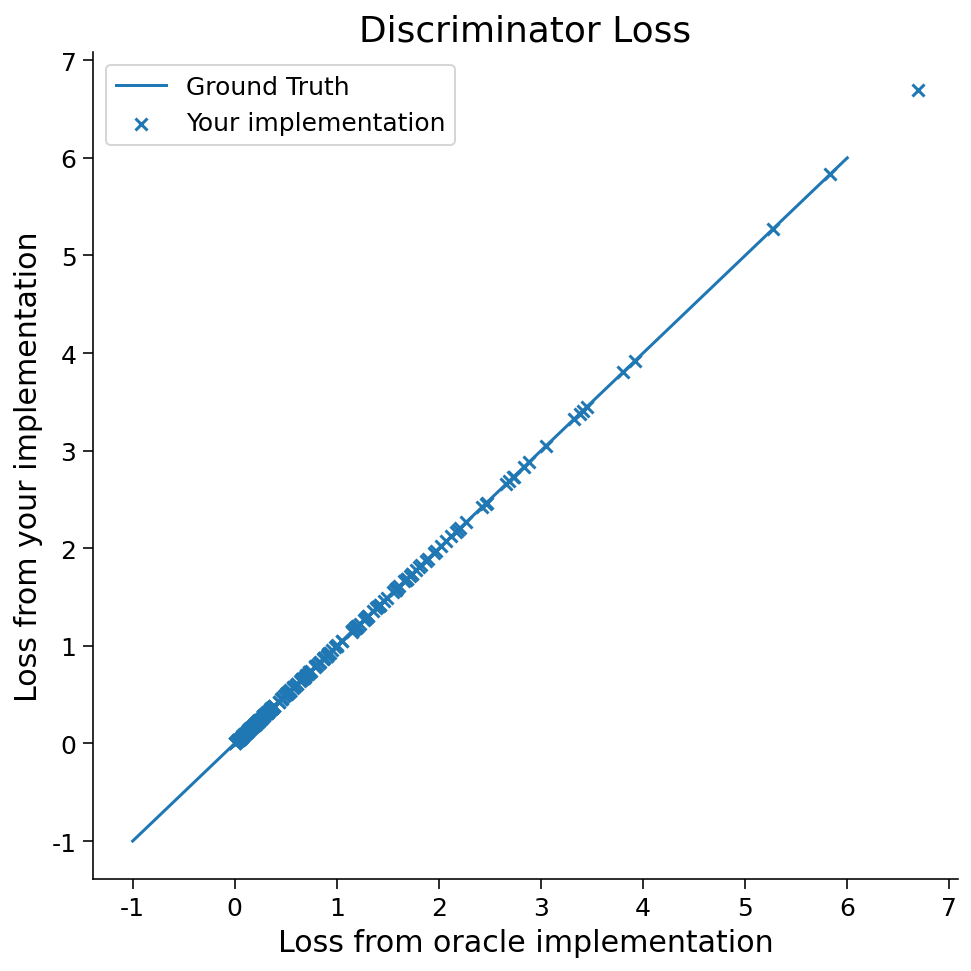

In [ ]:
def loss_disc(disc, x_real, x_fake):
  """
  Compute the discriminator loss for `x_real` and `x_fake` given `disc`

  Args:
    disc: Disc
      The discriminator
    x_real: ndarray
      An array of shape (N,) that contains the real samples
    x_fake: ndarray
      An array of shape (N,) that contains the fake samples

  Returns:
    ndarray with log of the discriminator loss
  """

  label_real = 1
  ## Hint: torch.log may be useful
  loss_real = -1 * label_real * torch.log(disc.classify(x_real))

  label_fake = 0
  loss_fake = -1 * (1 - label_fake) * torch.log(1 - disc.classify(x_fake))


  return torch.cat([loss_real, loss_fake])


# Add event to airtable
atform.add_event('Coding Exercise 2.1: Implement Discriminator Loss')

disc = DummyDisc()
gen = DummyGen()

x_real = get_data()
x_fake = gen.sample()

## Uncomment to check your function
ld = loss_disc(disc, x_real, x_fake)
plotting_ld(ld)

## Section 2.2:  The generator loss



### Coding Exercise 2.2: The generator loss


Random seed 1 has been set.
Random seed 0 has been set.


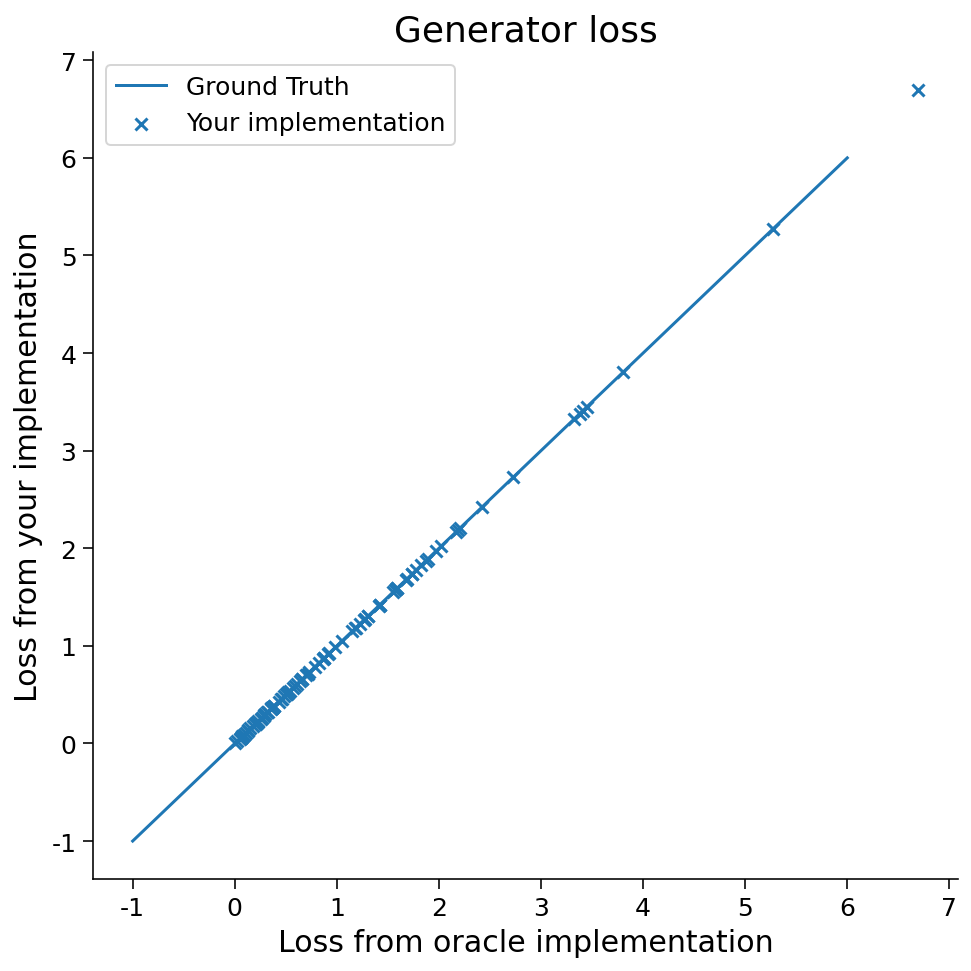

In [ ]:
def loss_gen(disc, x_fake):
  """
  Compute the generator loss for `x_fake` given `disc`

  Args:
    disc: Disc
      The generator
    x_fake: ndarray
      An array of shape (N,) that contains the fake samples

  Returns:
    loss_fake: ndarray
      The generator loss
  """
  loss_fake = - torch.log(disc.classify(x_fake))

  return loss_fake


# Add event to airtable
atform.add_event('Coding Exercise 2.3: The generator loss')

disc = DummyDisc()
gen = DummyGen()

x_fake = gen.sample()
## Uncomment below to check your function
lg = loss_gen(disc, x_fake)
plotting_lg(lg)

---
# Section 3: The difficulty of GAN training.

*Time estimate: ~10mins*

## Interactive Demo 3: Failure modes of GAN training

In [ ]:
# @title GAN training demo
# @markdown Make sure you execute this cell to enable the widget!

from IPython.display import IFrame
IFrame(src='https://xukai92.github.io/gan_demo/index.html', width=900, height=600)

---
# Section 4: GAN training in action!

*Time estimate: ~4mins*

## Interactive Demo 4: GAN training in action


In [ ]:
# @title GanLab
from IPython.display import HTML
HTML('<iframe width="1500" height="660" src="https://poloclub.github.io/ganlab/" allowfullscreen></iframe>')

/usr/local/lib/python3.7/dist-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
